<h1>Notebook para Streptosporangiaceae </h1>

In [1]:
import pandas as pd
import numpy as np
from scipy.spatial.distance import hamming
import gudhi as gd
import seaborn as sns
from statistics import mode
import multiprocessing
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import gudhi as gd
# from scipy.spatial.distance import hamming
import plotly.graph_objs as go
import networkx as nx
import plotly.graph_objects as go
import plotly.io as pio
from networkx.utils import not_implemented_for, pairwise
from concurrent.futures import ThreadPoolExecutor, as_completed
import plotly
import plotly.express as px
from module_functions import *

<h2>Se extrae la información </h2>

In [2]:
info=pd.read_csv('data/pscpStrepto.blast',sep='\t',header=None)
minimum_score=100
info=info[info[11]>=minimum_score]
info.reset_index(drop=True,inplace=True)
info=info.loc[:,0:1]
names=pd.read_csv('data/Strepto.ids',sep='\t',dtype='object',header=None)

<h2>Se crean los data frames</h2>

In [3]:
info_by_pathway_and_genomes_directions=get_info_by_pathway_and_all_genomes_directions(info)

In [4]:
df_by_pathway,df_by_pathway_drop_duplicate,representative_genomes=get_df_by_pathway(info_by_pathway_and_genomes_directions)

<AxesSubplot:>

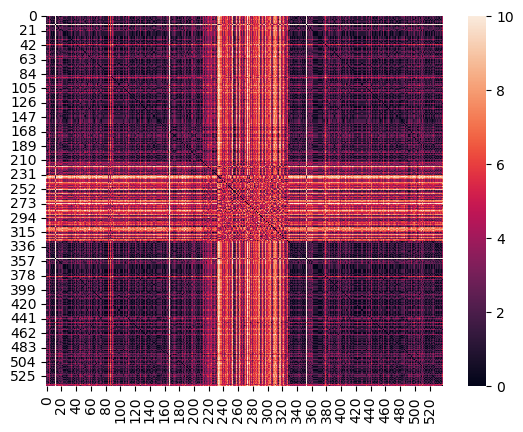

In [165]:
sns.heatmap(calculate_hamming_matrix(df_by_pathway['R5P_AMINOACIDS'].values))

/opt/conda/envs/TDA/lib/python3.7/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/opt/conda/envs/TDA/lib/python3.7/site-packages/seaborn/matrix.py:531: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  metric=self.metric)


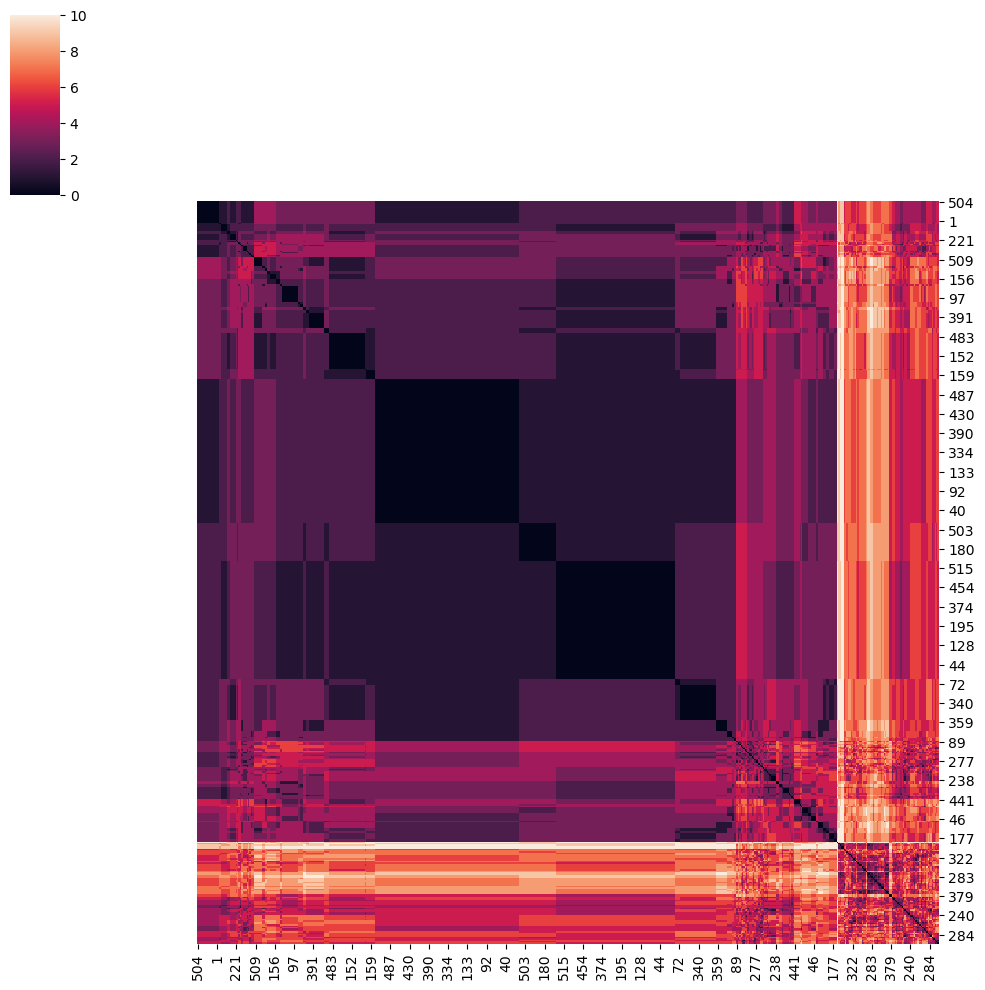

In [171]:
cg=sns.clustermap(calculate_hamming_matrix(df_by_pathway['R5P_AMINOACIDS'].values))
cg.ax_row_dendrogram.set_visible(False) #suppress row dendrogram

cg.ax_col_dendrogram.set_visible(False) #suppress column dendrogram
cg.savefig('heatmat.png')

In [162]:
calculate_hamming_matrix(df_by_pathway['R5P_AMINOACIDS'].values)

array([[0., 2., 2., ..., 1., 5., 4.],
       [2., 0., 2., ..., 1., 4., 4.],
       [2., 2., 0., ..., 1., 5., 4.],
       ...,
       [1., 1., 1., ..., 0., 5., 3.],
       [5., 4., 5., ..., 5., 0., 7.],
       [4., 4., 4., ..., 3., 7., 0.]])

<h2> Se crea el complejo simplicial</h2>

In [5]:
complex_pathways=get_complex_by_pathways(df_by_pathway_drop_duplicate)

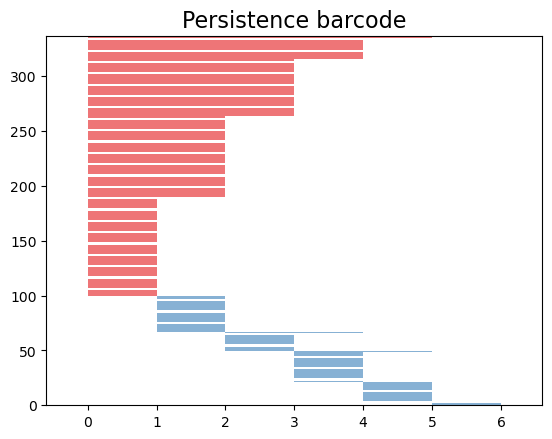

In [10]:
gd.plot_persistence_barcode(complex_pathways['TCA'][0])
plt.savefig('auxiliar.png')

usetex mode requires TeX.


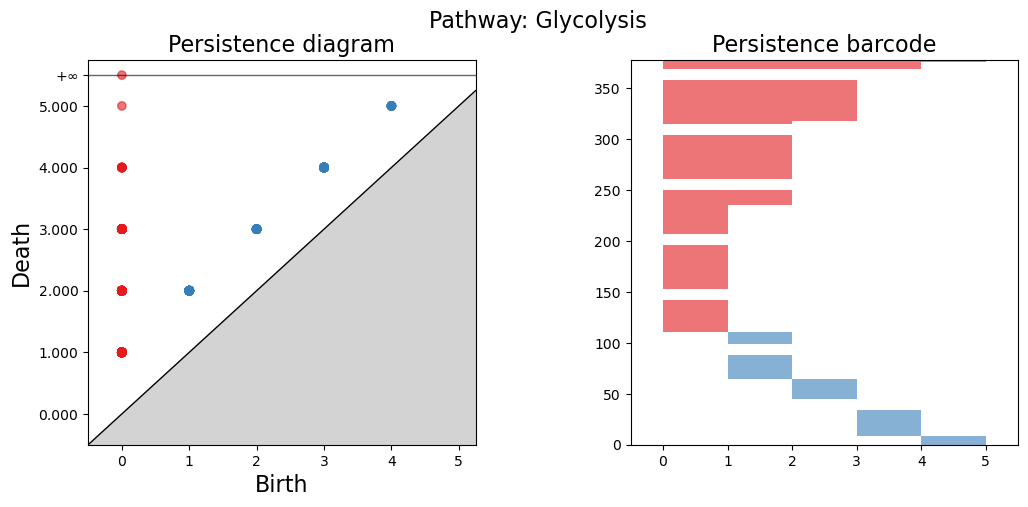

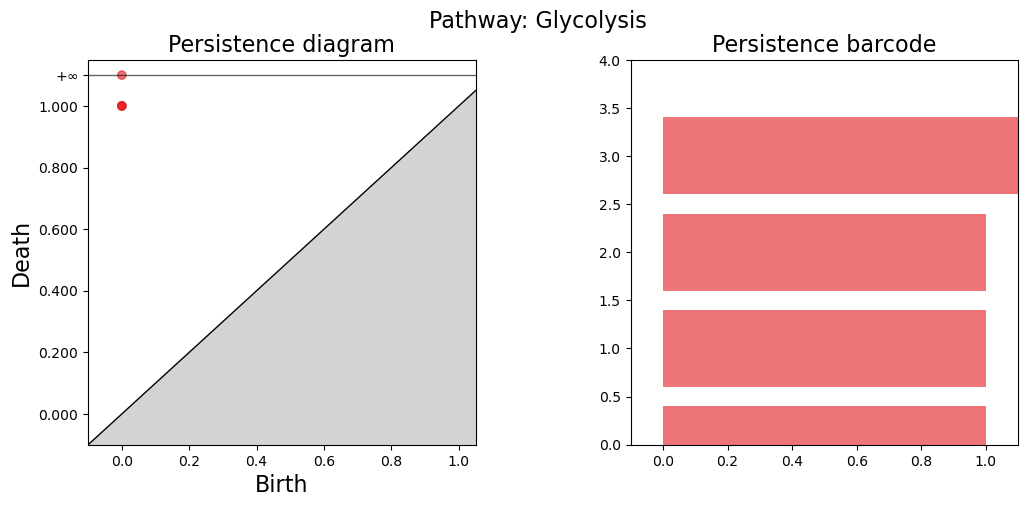

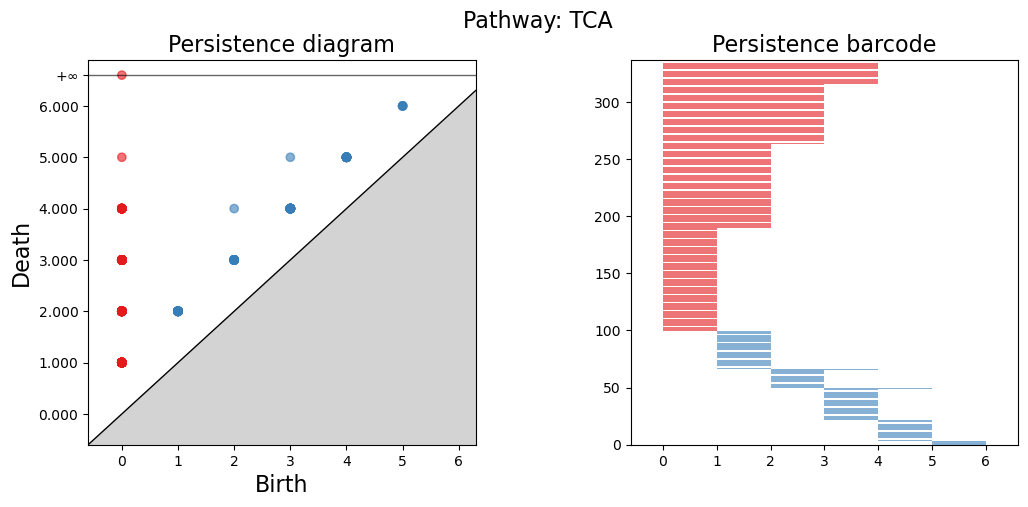

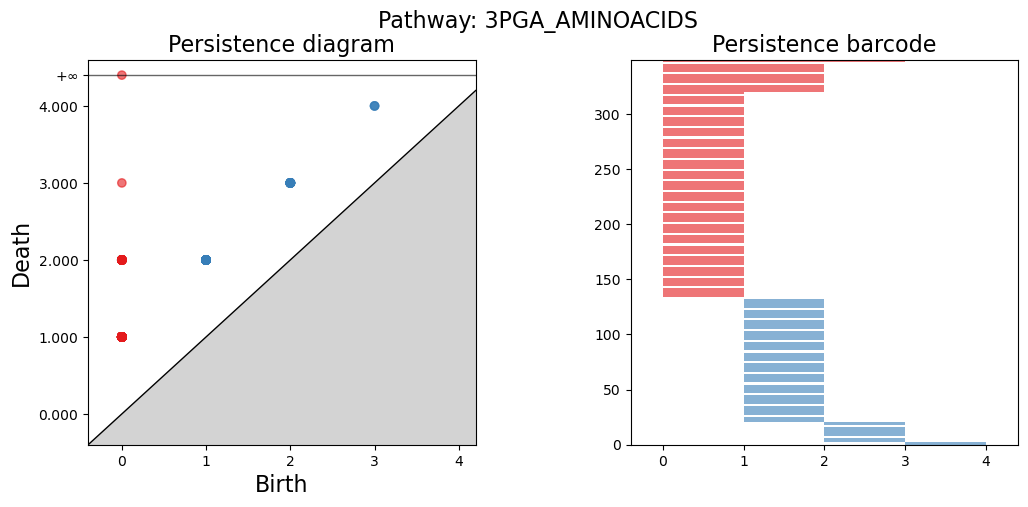

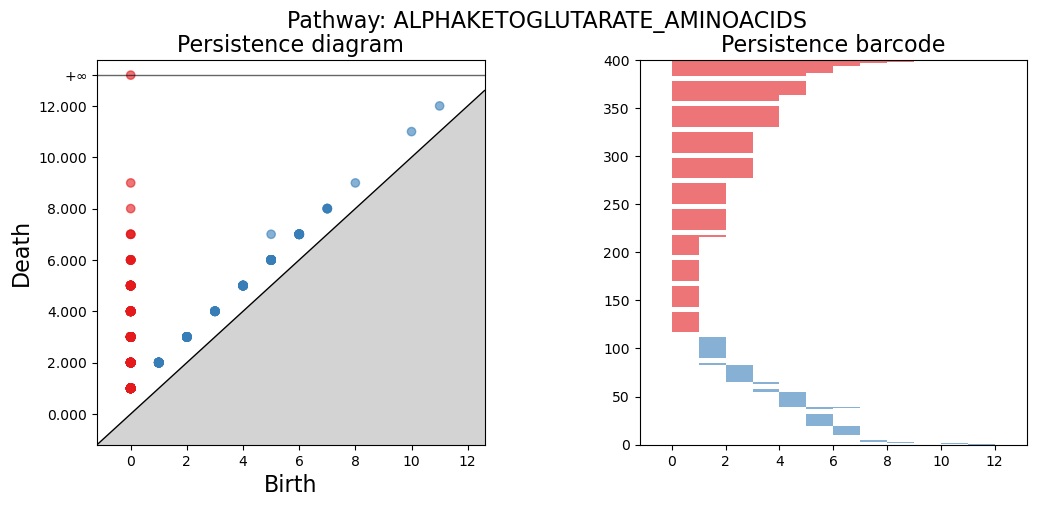

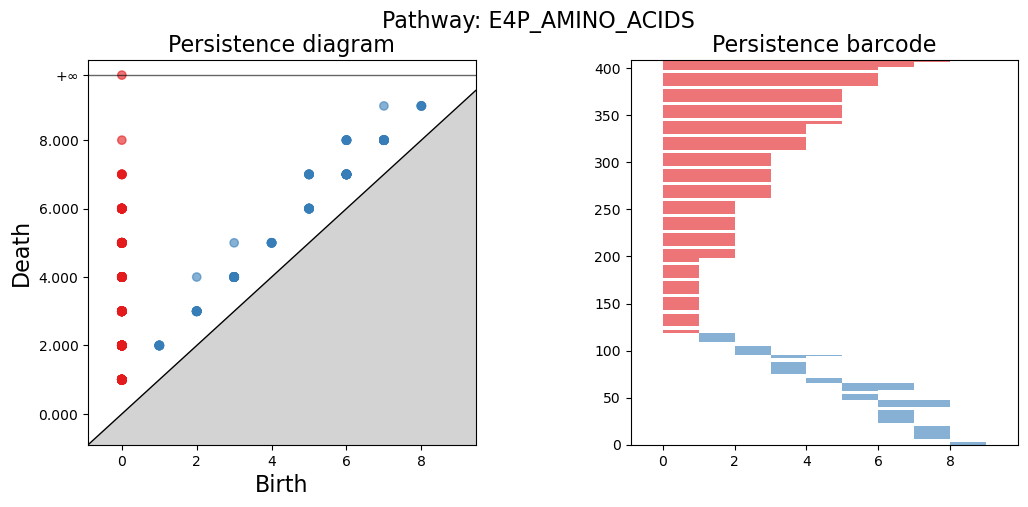

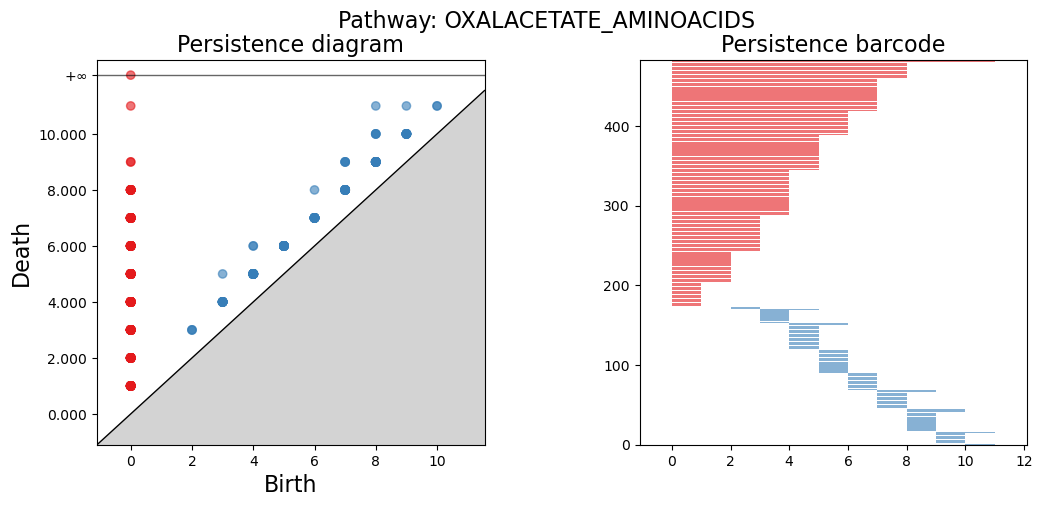

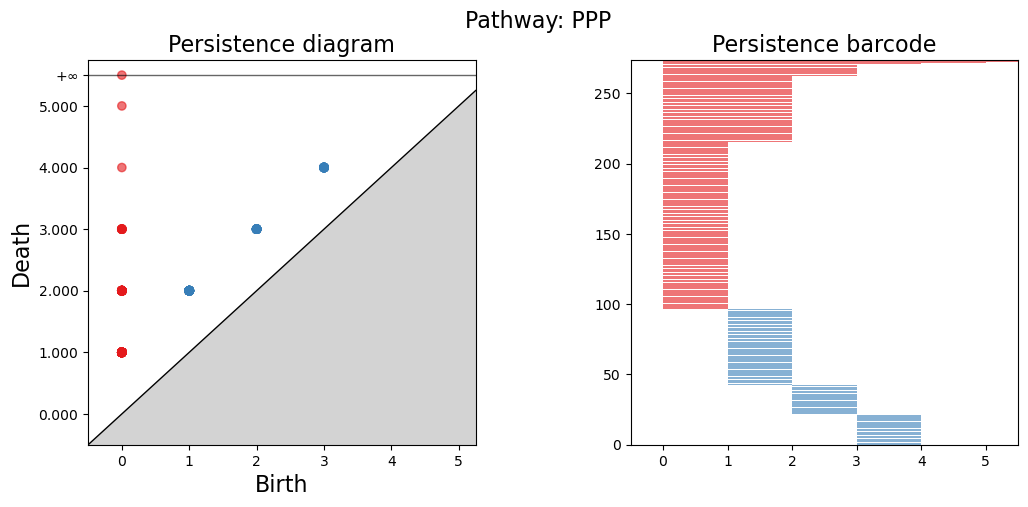

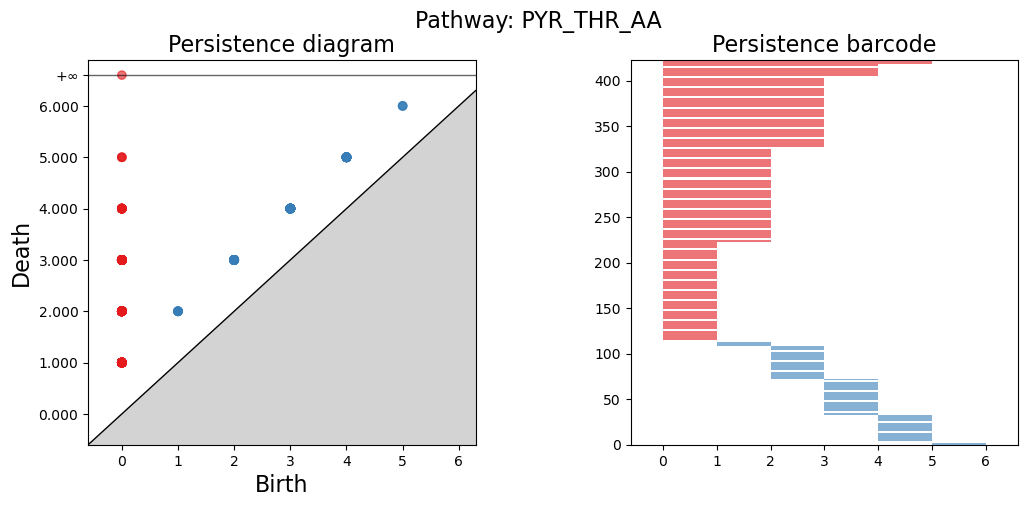

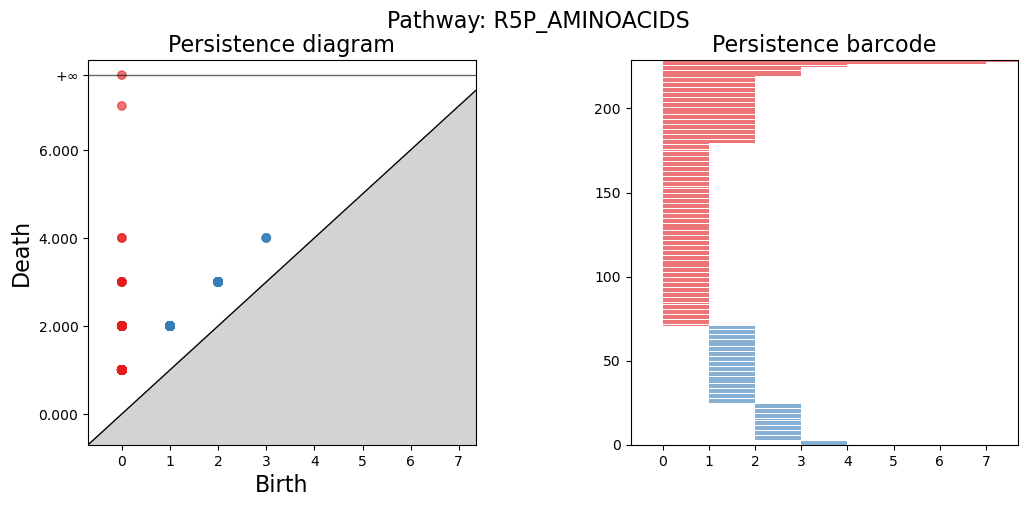

In [6]:
plot_all_bar_code_pathways(complex_pathways)

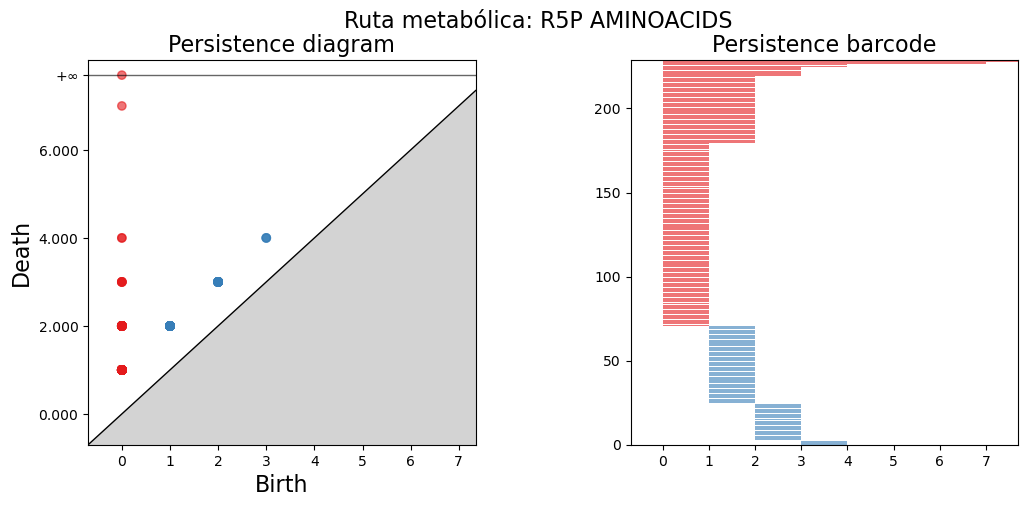

In [96]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
        
gd.plot_persistence_diagram(persistence=complex_pathways['R5P_AMINOACIDS'][0], axes=axes[0])
gd.plot_persistence_barcode(persistence=complex_pathways['R5P_AMINOACIDS'][0], axes=axes[1])
        
        # Agregar un título a la figura
fig.suptitle(f'Ruta metabólica: R5P AMINOACIDS', fontsize=16)

        # Ajustar el espacio entre las figuras
plt.subplots_adjust(wspace=0.4)  # Cambia el valor según sea necesario
plt.savefig('persistence_barcode_R5P_AMINOACIDS.jpg')
plt.show()

In [128]:
cont=0
for i in complex_pathways['R5P_AMINOACIDS'][0]:
    if i[0]==1:
        cont+=1

cont

71

In [ ]:
#plot_all_bar_code_pathways(complex_pathways)

<h2>Se buscan los uno hoyos</h2>

In [120]:
holes_by_pathway=change_vertex_to_code_per_path(holes_pathway_strepto(),df_by_pathway_drop_duplicate)

In [121]:
holes_by_pathway['\ufeffGlycolysis']=[]

In [122]:
resum=get_resum_df(df_by_pathway,representative_genomes,names,complex_pathways,holes_by_pathway)
resum

/opt/conda/envs/TDA/lib/python3.7/site-packages/pandas/core/internals/blocks.py:937: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr_value = np.asarray(value)


,num_columnas,num_hoyos,ciclos,ciclos por genero,duración hoyos
Glycolysis,10,111,[[[Microbispora rosea subsp. nonnitritogenes s...,"[[[Microbispora, Microbispora, Microbispora, M...",[1.0]
﻿Glycolysis,1,0,[],[],[]
TCA,11,99,"[[[Microbispora sp. ATCC PTA-5024 KI866522.1, ...","[[[Microbispora, Streptosporangium, Microbispo...","[1.0, 2.0]"
3PGA_AMINOACIDS,6,133,"[[[Microbispora sp. H10670 JABBWW010000001.1, ...","[[[Microbispora, Microbispora, Microbispora, M...",[1.0]
ALPHAKETOGLUTARATE_AMINOACIDS,15,112,"[[[Streptosporangium sp. caverna CP029711.1, S...","[[[Streptosporangium, Streptosporangium], [Mic...","[1.0, 2.0]"
E4P_AMINO_ACIDS,19,109,[[[Herbidospora cretacea strain NRRL B-16917 J...,"[[[Herbidospora, Herbidospora, Herbidospora, H...","[1.0, 2.0]"
OXALACETATE_AMINOACIDS,19,163,[[[Microbispora rosea subsp. nonnitritogenes s...,"[[[Microbispora, Microbispora, Microbispora, M...","[1.0, 2.0, 3.0]"
PPP,8,97,[[Streptosporangiaceae bacterium JOPF063 JASHQ...,"[[Streptosporangiaceae, Streptosporangiaceae, ...",[1.0]
PYR_THR_AA,10,112,"[[[Nonomuraea coxensis DSM 45129 KB903939.1, N...","[[[Nonomuraea, Nonomuraea, Nonomuraea, Nonomur...",[1.0]
R5P_AMINOACIDS,10,71,"[[[Thermobispora bispora DSM 43833 CP001874.1,...","[[[Thermobispora, Thermobispora, Microbispora,...",[1.0]


In [132]:
df_holes_pathway=get_df_by_pathway_make_hole(df_by_pathway_drop_duplicate,holes_by_pathway)

In [133]:
df_holes_pathway_droped_cols=get_df_by_pathway_make_hole_droped_cols(df_by_pathway_drop_duplicate,holes_by_pathway)

In [145]:
df_holes_pathway_droped_cols['R5P_AMINOACIDS'][0]

,histidinolphosphate_aminotransferase,phosphoribosyl_ATP_diphosphatase
R5P_AMINOACIDS,,
6666666.1069443,2,0
6666666.1069449,3,1
6666666.1069452,2,1
6666666.1069641,3,0


In [150]:
contar=[]
for i in df_holes_pathway_droped_cols['R5P_AMINOACIDS']:
    contar.extend(i)
for j in df_by_pathway['R5P_AMINOACIDS'].columns:
    print(j,contar.count(j))
    

histidinolphosphate_aminotransferase 40
histidinol_phosphatase 17
phosphoribosyl_AMP_cyclohydrolase 10
histidinol_dehydrogenase 18
ATP_phosphoribosyltransferase 24
imidazole_glycerol_phosphate_synthase_H 16
ribosephosphate_pyrophosphokinase 34
phosphoribosyl_isomerase_A 13
imidazoleglycerol_phosphate_dehydratase 15
phosphoribosyl_ATP_diphosphatase 11


<h2>Se ven los elementos que hacen el hoyo</h2>

In [ ]:
df_pathway_make_hole=get_df_by_pathway_make_hole(df_by_pathway_drop_duplicate,holes_by_pathway)

In [ ]:
len(df_pathway_make_hole['R5P_AMINOACIDS'][70])

In [ ]:
traduced_df(df_pathway_make_hole['R5P_AMINOACIDS'][3],names)

In [ ]:
gd.plot_persistence_barcode(complex_pathways['R5P_AMINOACIDS'][0])
gd.plot_persistence_diagram(complex_pathways['R5P_AMINOACIDS'][0])

In [172]:
visualize_simplicial_complex(complex_pathways['R5P_AMINOACIDS'][1],3,'R5P_AMINOACIDS','Strepto')

plotly.graph_objs._figure.Figure

<h2>Se buscan uno hoyos pero al separar por genero y ruta metabólica</h2>

In [63]:
df_by_genus_pathway,df_by_genus_pathway_drop_duplicate,representative_genomes_genus_pathway=get_df_by_genus_pathway(df_by_pathway,names)
complex_genus_pathways=get_complex_by_pathways(df_by_genus_pathway_drop_duplicate)

In [64]:
holes_genus_pathway=get_strepto_genus_path()

In [65]:
resum_genus=get_resum_df(df_by_genus_pathway,representative_genomes_genus_pathway,names,complex_genus_pathways,holes_genus_pathway)
resum_genus

/opt/conda/envs/TDA/lib/python3.7/site-packages/pandas/core/internals/blocks.py:937: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr_value = np.asarray(value)


,num_columnas,num_hoyos,ciclos,ciclos por genero,duración hoyos
Streptosporangium_Glycolysis,10,1,"[[[Streptosporangium sp. caverna CP029711.1, S...","[[[Streptosporangium, Streptosporangium, Strep...",[1.0]
Thermobispora_Glycolysis,10,0,[],[],[]
Nonomuraea_Glycolysis,10,9,"[[[Nonomuraea sp. NEAU-A123 JAHFZZ010000001.1,...","[[[Nonomuraea, Nonomuraea], [Nonomuraea, Nonom...",[1.0]
Microbispora_Glycolysis,10,2,[[[Microbispora corallina NBRC 16416 BOOC01000...,"[[[Microbispora, Microbispora], [Microbispora,...",[1.0]
Herbidospora_Glycolysis,10,1,"[[[Herbidospora daliensis BBXF01000001.1, Herb...","[[[Herbidospora, Herbidospora], [Herbidospora,...",[1.0]
...,...,...,...,...,...
Sinosporangium_R5P_AMINOACIDS,10,0,[],[],[]
Streptosporangiaceae_R5P_AMINOACIDS,10,38,[[Streptosporangiaceae bacterium JOPF586 JASIK...,"[[Streptosporangiaceae, Streptosporangiaceae, ...",[1.0]
Rhizohabitans_R5P_AMINOACIDS,10,0,[],[],[]
Acidimicrobium_R5P_AMINOACIDS,10,0,[],[],[]


In [66]:
df_genus_pathway_make_hole=get_df_by_pathway_make_hole(df_by_genus_pathway_drop_duplicate,holes_genus_pathway)

In [ ]:
df_genus_pathway_make_hole['Rhizohabitans_R5P_AMINOACIDS']

<h2>Especificamente para la ruta R5P_AMINOACIDS:</h2>

In [97]:
complex_genus_R5P_AMINOACIDS={}
df_by_genus_R5P_AMINOACIDS_drop_duplicate={}
representative_genomes_by_genus_R5P_AMINOACIDS={}
df_by_genus_pathway_R5P_AMINOACIDS={}
for key in complex_genus_pathways.keys():
    if 'R5P_AMINOACIDS' in key:
        df_by_genus_pathway_R5P_AMINOACIDS[key]=df_by_genus_pathway[key]
        complex_genus_R5P_AMINOACIDS[key]=complex_genus_pathways[key]
        df_by_genus_R5P_AMINOACIDS_drop_duplicate[key]=df_by_genus_pathway_drop_duplicate[key]
        representative_genomes_by_genus_R5P_AMINOACIDS[key]=representative_genomes_genus_pathway[key]

In [98]:
cont=0
for key in df_by_genus_pathway_R5P_AMINOACIDS.keys():
    cont=cont+df_by_genus_pathway_R5P_AMINOACIDS[key].shape[0]
    print(key, df_by_genus_pathway_R5P_AMINOACIDS[key].shape[0])
cont

Streptosporangium_R5P_AMINOACIDS 37
Thermobispora_R5P_AMINOACIDS 8
Nonomuraea_R5P_AMINOACIDS 137
Microbispora_R5P_AMINOACIDS 87
Herbidospora_R5P_AMINOACIDS 18
Microtetraspora_R5P_AMINOACIDS 16
Planomonospora_R5P_AMINOACIDS 19
Planobispora_R5P_AMINOACIDS 12
Thermoactinospora_R5P_AMINOACIDS 3
Sphaerisporangium_R5P_AMINOACIDS 29
Spongiactinospora_R5P_AMINOACIDS 6
Bailinhaonella_R5P_AMINOACIDS 2
Thermopolyspora_R5P_AMINOACIDS 4
Acrocarpospora_R5P_AMINOACIDS 10
Thermocatellispora_R5P_AMINOACIDS 2
Planotetraspora_R5P_AMINOACIDS 12
Sphaerimonospora_R5P_AMINOACIDS 2
Sinosporangium_R5P_AMINOACIDS 4
Streptosporangiaceae_R5P_AMINOACIDS 127
Rhizohabitans_R5P_AMINOACIDS 2
Acidimicrobium_R5P_AMINOACIDS 1
Actinomadura_R5P_AMINOACIDS 1


539

In [99]:
traduced_df(df_by_genus_pathway_R5P_AMINOACIDS['Acidimicrobium_R5P_AMINOACIDS'],names)

,histidinolphosphate_aminotransferase,histidinol_phosphatase,phosphoribosyl_AMP_cyclohydrolase,histidinol_dehydrogenase,ATP_phosphoribosyltransferase,imidazole_glycerol_phosphate_synthase_H,ribosephosphate_pyrophosphokinase,phosphoribosyl_isomerase_A,imidazoleglycerol_phosphate_dehydratase,phosphoribosyl_ATP_diphosphatase
Acidimicrobium_R5P_AMINOACIDS,,,,,,,,,,
Acidimicrobium ferrooxidans DSM 10331 NC_013124.1,1,0,1,1,1,1,1,1,1,0


In [103]:
holes_R5P_AMINOACIDS=get_holes_by_pathways(complex_genus_R5P_AMINOACIDS,df_by_genus_R5P_AMINOACIDS_drop_duplicate)

se buscan ciclos en el tiempo 2.0 para Streptosporangium_R5P_AMINOACIDS
Se encontró el ciclo [9, 3, 1, 0] en el tiempo 1.0 para Streptosporangium_R5P_AMINOACIDS
Se encontró el ciclo [4, 7, 3, 1] en el tiempo 1.0 para Streptosporangium_R5P_AMINOACIDS
se buscan ciclos en el tiempo 2.0 para Nonomuraea_R5P_AMINOACIDS
Se encontró el ciclo [5, 10, 2, 1] en el tiempo 1.0 para Nonomuraea_R5P_AMINOACIDS
Se encontró el ciclo [14, 18, 5, 1] en el tiempo 1.0 para Nonomuraea_R5P_AMINOACIDS
Se encontró el ciclo [7, 2, 1, 0] en el tiempo 1.0 para Nonomuraea_R5P_AMINOACIDS
se buscan ciclos en el tiempo 2.0 para Microbispora_R5P_AMINOACIDS
Se encontró el ciclo [10, 2, 7, 3] en el tiempo 1.0 para Microbispora_R5P_AMINOACIDS
se buscan ciclos en el tiempo 2.0 para Acrocarpospora_R5P_AMINOACIDS
Se encontró el ciclo [4, 2, 1, 0] en el tiempo 1.0 para Acrocarpospora_R5P_AMINOACIDS
se buscan ciclos en el tiempo 2.0 para Streptosporangiaceae_R5P_AMINOACIDS
Se encontró el ciclo [43, 44, 24, 17] en el tiempo 1.0

In [106]:
resum_R5P_AMINOACIDS=get_resum_df(df_by_genus_pathway_R5P_AMINOACIDS,representative_genomes_by_genus_R5P_AMINOACIDS,names,complex_genus_R5P_AMINOACIDS,holes_R5P_AMINOACIDS)
resum_R5P_AMINOACIDS

/opt/conda/envs/TDA/lib/python3.7/site-packages/pandas/core/internals/blocks.py:937: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr_value = np.asarray(value)


,num_columnas,num_hoyos,ciclos,ciclos por genero,duración hoyos
Streptosporangium_R5P_AMINOACIDS,10,2,"[[[Streptosporangium sp. caverna CP029711.1, S...","[[[Streptosporangium, Streptosporangium, Strep...",[1.0]
Thermobispora_R5P_AMINOACIDS,10,0,[],[],[]
Nonomuraea_R5P_AMINOACIDS,10,3,[[[Nonomuraea deserti strain KC310 SMKO0100010...,"[[[Nonomuraea, Nonomuraea, Nonomuraea, Nonomur...",[1.0]
Microbispora_R5P_AMINOACIDS,10,1,[[[Microbispora hainanensis strain DSM 45428 V...,"[[[Microbispora, Microbispora], [Microbispora,...",[1.0]
Herbidospora_R5P_AMINOACIDS,10,0,[],[],[]
Microtetraspora_R5P_AMINOACIDS,10,0,[],[],[]
Planomonospora_R5P_AMINOACIDS,10,0,[],[],[]
Planobispora_R5P_AMINOACIDS,10,0,[],[],[]
Thermoactinospora_R5P_AMINOACIDS,10,0,[],[],[]
Sphaerisporangium_R5P_AMINOACIDS,10,0,[],[],[]


In [107]:
df_holes_R5P_AMINOACIDS=get_df_by_pathway_make_hole(df_by_genus_R5P_AMINOACIDS_drop_duplicate,holes_R5P_AMINOACIDS)

In [175]:
df_holes_R5P_AMINOACIDS['Nonomuraea_R5P_AMINOACIDS'][0]

,histidinolphosphate_aminotransferase,histidinol_phosphatase,phosphoribosyl_AMP_cyclohydrolase,histidinol_dehydrogenase,ATP_phosphoribosyltransferase,imidazole_glycerol_phosphate_synthase_H,ribosephosphate_pyrophosphokinase,phosphoribosyl_isomerase_A,imidazoleglycerol_phosphate_dehydratase,phosphoribosyl_ATP_diphosphatase
Nonomuraea_R5P_AMINOACIDS,,,,,,,,,,
6666666.1069493,2,1,1,2,1,2,2,1,1,1
6666666.1069512,2,2,1,2,1,2,2,1,1,1
6666666.1069457,2,2,1,1,1,2,2,1,1,1
6666666.1069454,2,1,1,1,1,2,2,1,1,1


In [108]:
df_holes_R5P_AMINOACIDS_droped_cols=get_df_by_pathway_make_hole_droped_cols(df_by_genus_R5P_AMINOACIDS_drop_duplicate,holes_R5P_AMINOACIDS)

In [177]:
df_holes_pathway['R5P_AMINOACIDS'][0]

,histidinolphosphate_aminotransferase,histidinol_phosphatase,phosphoribosyl_AMP_cyclohydrolase,histidinol_dehydrogenase,ATP_phosphoribosyltransferase,imidazole_glycerol_phosphate_synthase_H,ribosephosphate_pyrophosphokinase,phosphoribosyl_isomerase_A,imidazoleglycerol_phosphate_dehydratase,phosphoribosyl_ATP_diphosphatase
R5P_AMINOACIDS,,,,,,,,,,
6666666.1069443,2,1,1,1,1,2,2,1,1,0
6666666.1069449,3,1,1,1,1,2,2,1,1,1
6666666.1069452,2,1,1,1,1,2,2,1,1,1
6666666.1069641,3,1,1,1,1,2,2,1,1,0


In [178]:
df_holes_pathway_droped_cols['R5P_AMINOACIDS'][0]

,histidinolphosphate_aminotransferase,phosphoribosyl_ATP_diphosphatase
R5P_AMINOACIDS,,
6666666.1069443,2,0
6666666.1069449,3,1
6666666.1069452,2,1
6666666.1069641,3,0


In [186]:
for i in traduced_df(df_by_pathway['R5P_AMINOACIDS'],names).index:
    if 'K' in i:
        print(i)


Nonomuraea coxensis DSM 45129 KB903939.1
Microbispora sp. ATCC PTA-5024 KI866522.1
Nonomuraea candida strain NRRL B-24552 KL647031.1
Microbispora sp. GMKU363 BCBX01000001.1
Microtetraspora fusca BBYK01000001.1
Microbispora sp. GKU 823 MWJN01000001.1
Thermoactinospora rubra strain YIM 77501 KZ084324.1
Nonomuraea indica strain DRQ-2 KZ559466.1
Thermobispora sp. RSA20 PKEL01000164.1
Spongiactinospora gelatinilytica strain 7K107 POUA01000100.1
Nonomuraea aridisoli strain KC333 POUD01000100.1
Nonomuraea longispora strain KC201 SMJZ01000100.1
Nonomuraea deserti strain KC310 SMKO01000100.1
Nonomuraea terrae strain CH32 SMKQ01000100.1
Nonomuraea diastatica strain KC712 SMKP01000100.1
Nonomuraea mesophila strain 6K102 SMLD01000100.1
Nonomuraea sp. KC401 VBUN01000100.1
Nonomuraea zeae strain DSM 100528 VCKX01000750.1
Nonomuraea turkmeniaca strain DSM 43926 VCKY01000100.1
Microbispora sp. KK1-11 VIRJ01000100.1
Microbispora sp. SCL1-1 VIRK01000001.1
Nonomuraea sp. K271 JAAAHR010000001.1
Microbispo

In [184]:
traduced_df(df_by_pathway['R5P_AMINOACIDS'],names).index

Index(['Streptosporangium roseum DSM 43021 CP001814.1',
       'Thermobispora bispora DSM 43833 CP001874.1',
       'Nonomuraea coxensis DSM 45129 KB903939.1',
       'Microbispora sp. ATCC PTA-5024 KI866522.1',
       'Microbispora rosea subsp. rosea strain NRRL B-2630',
       'Microbispora rosea subsp. nonnitritogenes strain NRRL B-2631',
       'Microbispora sp. NRRL B-24597 JOAF01000001.1',
       'Herbidospora cretacea strain NRRL B-16917 JODQ01000001.1',
       'Streptosporangium amethystogenes strain NRRL B-2639 JOEQ01000001.1',
       'Microtetraspora glauca strain NRRL B-3735 JOFO01000001.1',
       ...
       'Nonomuraea maritima strain CGMCC 4.5681 NZ_FNFB01000085.1',
       'Sinosporangium album strain CPCC 201354 NZ_FNCN01000098.1',
       'Nonomuraea solani strain CGMCC 4.7037 NZ_FNVT01000079.1',
       'Nonomuraea pusilla strain DSM 43357 NZ_FOBF01000066.1',
       'Nonomuraea wenchangensis strain CGMCC 4.5598 NZ_FOHX01000040.1',
       'Streptosporangium canum strain C

In [151]:
contar=[]
for i in df_holes_R5P_AMINOACIDS_droped_cols['Streptosporangium_R5P_AMINOACIDS']:
    contar.extend(i)
for j in df_by_pathway['R5P_AMINOACIDS'].columns:
    print(j,contar.count(j))
    

histidinolphosphate_aminotransferase 1
histidinol_phosphatase 1
phosphoribosyl_AMP_cyclohydrolase 0
histidinol_dehydrogenase 0
ATP_phosphoribosyltransferase 0
imidazole_glycerol_phosphate_synthase_H 0
ribosephosphate_pyrophosphokinase 2
phosphoribosyl_isomerase_A 0
imidazoleglycerol_phosphate_dehydratase 0
phosphoribosyl_ATP_diphosphatase 0


In [153]:
contar=[]
for i in df_holes_R5P_AMINOACIDS_droped_cols['Nonomuraea_R5P_AMINOACIDS']:
    contar.extend(i)
for j in df_by_pathway['R5P_AMINOACIDS'].columns:
    print(j,contar.count(j))
    

histidinolphosphate_aminotransferase 0
histidinol_phosphatase 2
phosphoribosyl_AMP_cyclohydrolase 0
histidinol_dehydrogenase 2
ATP_phosphoribosyltransferase 1
imidazole_glycerol_phosphate_synthase_H 0
ribosephosphate_pyrophosphokinase 1
phosphoribosyl_isomerase_A 0
imidazoleglycerol_phosphate_dehydratase 0
phosphoribosyl_ATP_diphosphatase 0


In [154]:
contar=[]
for i in df_holes_R5P_AMINOACIDS_droped_cols['Microbispora_R5P_AMINOACIDS']:
    contar.extend(i)
for j in df_by_pathway['R5P_AMINOACIDS'].columns:
    print(j,contar.count(j))
    

histidinolphosphate_aminotransferase 1
histidinol_phosphatase 0
phosphoribosyl_AMP_cyclohydrolase 0
histidinol_dehydrogenase 0
ATP_phosphoribosyltransferase 0
imidazole_glycerol_phosphate_synthase_H 0
ribosephosphate_pyrophosphokinase 1
phosphoribosyl_isomerase_A 0
imidazoleglycerol_phosphate_dehydratase 0
phosphoribosyl_ATP_diphosphatase 0


In [155]:
contar=[]
for i in df_holes_R5P_AMINOACIDS_droped_cols['Acrocarpospora_R5P_AMINOACIDS']:
    contar.extend(i)
for j in df_by_pathway['R5P_AMINOACIDS'].columns:
    print(j,contar.count(j))
    

histidinolphosphate_aminotransferase 1
histidinol_phosphatase 0
phosphoribosyl_AMP_cyclohydrolase 0
histidinol_dehydrogenase 0
ATP_phosphoribosyltransferase 1
imidazole_glycerol_phosphate_synthase_H 0
ribosephosphate_pyrophosphokinase 0
phosphoribosyl_isomerase_A 0
imidazoleglycerol_phosphate_dehydratase 0
phosphoribosyl_ATP_diphosphatase 0


In [156]:
contar=[]
for i in df_holes_R5P_AMINOACIDS_droped_cols['Streptosporangiaceae_R5P_AMINOACIDS']:
    contar.extend(i)
for j in df_by_pathway['R5P_AMINOACIDS'].columns:
    print(j,contar.count(j))
    

histidinolphosphate_aminotransferase 25
histidinol_phosphatase 8
phosphoribosyl_AMP_cyclohydrolase 10
histidinol_dehydrogenase 11
ATP_phosphoribosyltransferase 18
imidazole_glycerol_phosphate_synthase_H 14
ribosephosphate_pyrophosphokinase 23
phosphoribosyl_isomerase_A 10
imidazoleglycerol_phosphate_dehydratase 15
phosphoribosyl_ATP_diphosphatase 0


In [119]:
df_holes_R5P_AMINOACIDS_droped_cols['Streptosporangium_R5P_AMINOACIDS']

[                                 histidinolphosphate_aminotransferase  \
 Streptosporangium_R5P_AMINOACIDS                                        
 6666666.1069482                                                     3   
 6666666.1069553                                                     3   
 6666666.1069480                                                     2   
 6666666.1069452                                                     2   
 
                                  ribosephosphate_pyrophosphokinase  
 Streptosporangium_R5P_AMINOACIDS                                    
 6666666.1069482                                                  2  
 6666666.1069553                                                  1  
 6666666.1069480                                                  1  
 6666666.1069452                                                  2  ,
                                  histidinol_phosphatase  \
 Streptosporangium_R5P_AMINOACIDS                          
 6666666.1069

In [75]:
L=[]
for i in df_holes_R5P_AMINOACIDS_droped_cols['Streptosporangiaceae_R5P_AMINOACIDS']:
    
    L.extend(list(i.columns))
for j in set(L):
    print(L.count(j),j)

25 histidinolphosphate_aminotransferase
8 histidinol_phosphatase
10 phosphoribosyl_AMP_cyclohydrolase
11 histidinol_dehydrogenase
18 ATP_phosphoribosyltransferase
14 imidazole_glycerol_phosphate_synthase_H
23 ribosephosphate_pyrophosphokinase
10 phosphoribosyl_isomerase_A
15 imidazoleglycerol_phosphate_dehydratase


In [76]:
df_holes_R5P_AMINOACIDS_droped_cols['Streptosporangiaceae_R5P_AMINOACIDS'][0]

,histidinolphosphate_aminotransferase,imidazole_glycerol_phosphate_synthase_H,imidazoleglycerol_phosphate_dehydratase
Streptosporangiaceae_R5P_AMINOACIDS,,,
6666666.1069712,1,2,0
6666666.1069700,2,2,1
6666666.1069701,2,1,1
6666666.1069684,0,1,0


In [ ]:
traduced_df(df_holes_R5P_AMINOACIDS_droped_cols['Streptosporangiaceae_R5P_AMINOACIDS'][0],names)

In [ ]:
    representative_genomes_by_genus_R5P_AMINOACIDS['Rhizohabitans_R5P_AMINOACIDS']

In [ ]:
df_by_genus_pathway_R5P_AMINOACIDS['Rhizohabitans_R5P_AMINOACIDS']

In [ ]:
set(L)

In [ ]:
df_holes_R5P_AMINOACIDS_droped_cols['Streptosporangiaceae_R5P_AMINOACIDS'][0]

In [ ]:
traduced_df(df_holes_R5P_AMINOACIDS['Nonomuraea_R5P_AMINOACIDS'][0],names)

In [ ]:
traduced_df(df_holes_R5P_AMINOACIDS['Nonomuraea_R5P_AMINOACIDS'][1],names)

In [ ]:
traduced_df(df_holes_R5P_AMINOACIDS['Streptosporangium_R5P_AMINOACIDS'][0],names)

In [ ]:
drop_columns_same_values()

In [ ]:
traduced_df(df_by_genus_pathway['Streptosporangium_R5P_AMINOACIDS'],names)['phosphoribosyl_isomerase_A'].values

In [ ]:
phosphoribosyl_isomerase_A buscar en Microbisco